<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao

# Algoritmo de Shor

En este notebook, primero presentamos el problema de factorización de enteros y describimos en detalle cómo lo resuelve el algoritmo de forma clásica y de forma cuántica con el algoritmo de Shor, implementando en python ambos metodos y utilizando Qiskit en la version cuántica.

Para empezar Importamos las librerias necesarias.

In [1]:
# Importing standard Qiskit libraries
from qiskit.visualization import *
from qiskit.circuit import *
from qiskit.extensions import *
from qiskit.tools.jupyter import *
#from ibm_quantum_widgets import *

from qiskit import QuantumCircuit, Aer, execute, transpile, assemble
from qiskit.providers.aer import QasmSimulator
from qiskit import IBMQ
from qiskit.visualization import plot_histogram
from qiskit.tools.visualization import plot_state_city
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import Operator
import qiskit.quantum_info as qi
from qiskit.providers.fake_provider import FakeKolkata,FakeMontreal,FakeGuadalupe
from qiskit.providers.aer import AerSimulator

import time
import numpy as np
import math
import matplotlib.pyplot as plt
from math import gcd,log
from numpy.random import randint
import pandas as pd
from fractions import Fraction
import pickle

## Factorizacion

En el problema de la factorizacion tenemos un número entero *N* que es producto de dos números primos *p* y *q*. El objetivo es que dado *N* encontremos los factores *p* y *q*. Si estos factores se restringen a números primos, se dice que *N* es un semiprimo y el proceso se llama factorización prima. 

Cuando el número entero *N* es muy grande, no se conoce ningún algoritmo clásico eficiente de factorización de enteros. Los problemas de factorización más difíciles son los números semiprimos, el producto de dos números primos. 

En [2009](https://link.springer.com/chapter/10.1007/978-3-642-14623-7_18), un equipo de investigadores factorizó un número semiprimo de 232 dígitos decimales (768 bits), gastando el equivalente computacional de más de dos mil años en un procesador AMD Opteron de un solo núcleo a 2,2 GHz con 2 GB de RAM:
```
RSA-768 = 12301866845301177551304949583849627207728535695953347921973224521517264005
           07263657518745202199786469389956474942774063845925192557326303453731548268
           50791702612214291346167042921431160222124047927473779408066535141959745985
           6902143413
           
         = 33478071698956898786044169848212690817704794983713768568912431388982883793
           878002287614711652531743087737814467999489
         × 36746043666799590428244633799627952632279158164343087642676032283815739666
           511279233373417143396810270092798736308917
```
La supuesta dificultad de este problema de factorización prima es la base de muchos algoritmos de cifrado, como [RSA](https://www.google.com/patents/US4405829), que se utiliza en transacciones web online, entre otras aplicaciones. En RSA, para encontrar la llave de cifrado sería necesario factorizar N=pq encontrando dos primos de igual longitud en bits n/2. Desde 2015 se recomienda utilizar RSA 2048 y ahora se utiliza tambien RSA 4096, con unas longitudes de N de ese orden
***

## Algoritmo de Miller

El algoritmo de Miller, resuelve el problema de la factorizacion con la estrategia de reducirlo al problema de encontrar el periodo de la exponenciacion modular. El algoritmo clásico más eficiente para la resolución de este problema es el **general number field sieve (GNFS)**, el cual para factorizar un número de $n$ bits requiere un tiempo de trabajo $\Theta (e^{n^{1/3}})$. Este tiempo es subexponencial, asi que crece más rápido que una solución polinomial.

Para implementarlo, veamos que es la operacion de exponenciacion modular.

Son coprimos
1
2
4
8
16
11
1
2
4
8
16
11
1
El periodo es  6


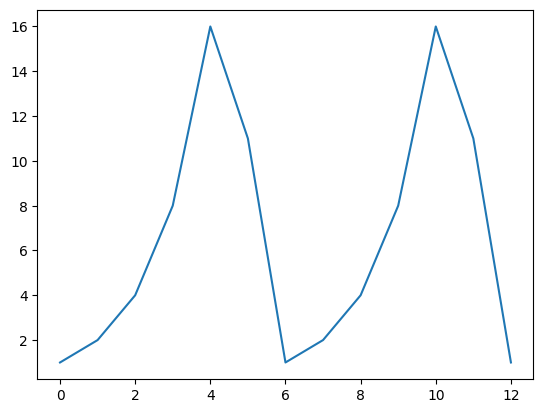

In [2]:
#visualización del periodo
a=2
N=21

#utiliza gcd de math libraries para chequear que a and N son coprimos
if math.gcd(a,N):
    print("Son coprimos")
else:
    print("No son coprimos")

#calcula la secuencia de resultados de f(x)    
r = 1
for ind in range(13):
    print(int(math.pow(a,ind)%N))
    if ind > 1 and r == 1 and int(math.pow(a,ind)%N) == 1:
        r = ind
print("El periodo es ", r)

#representalos en un plot con x el indice del resultado e y el valor
plt.plot([math.pow(a,x)%N for x in range(13)])

### La exponenciación modular

La exponenciación modular es una operacion o funcion que consiste en calcular las potencias de un número modulo de otro numero:

\begin{equation}
\mathcal{f}(x) = a^x \bmod N
\end{equation}
\begin{equation}
a=2 , N=21
\end{equation}
\begin{equation}
  2^0\;mod\;21=1\;mod\;21
\end{equation}
\begin{equation}
  2^1\;mod\;21=2\;mod\;21
\end{equation}
\begin{equation}
  2^2\;mod\;21=4\;mod\;21
\end{equation}
\begin{equation}
  2^3\;mod\;21=8\;mod\;21
\end{equation}
\begin{equation}
  2^4\;mod\;21=16\;mod\;21
\end{equation}
\begin{equation}
  2^5\;mod\;21=11\;mod\;21
\end{equation}\begin{equation}
  2^6\;mod\;21=1\;\;mod\;21
\end{equation}\begin{equation}
  2^7\;mod\;21=2\;mod\;21
\end{equation}


Como se puede ver, aparece un periodo de orden *r* para cualesquiera *a* y *N*, siempre que estos sean dos números coprimos, esto es, que el único entero positivo que los divide es 1. Esto equivale a que su máximo común divisor sea 1. Por ejemplo, 8 y 15 son coprimos, ya que no comparten ningún factor común ( distintos de 1). Sin embargo, 9 y 15 no son coprimos, ya que ambos son divisibles por 3 (y 1).

#### EJERCICIO

Dados dos numeros $N$ y $a$ calcula si son coprimos.

Calcula la secuencia de los resultados de la funcion de exponenciacion modular  $\mathcal{f}(x) = a^x \bmod N$ y su periodo

Dibuja un grafico donde se visualice el periodo de la funcion

Son coprimos
1
2
4
8
16
11
1
2
4
8
16
11
1
2
4
8
16
11
1
2
4


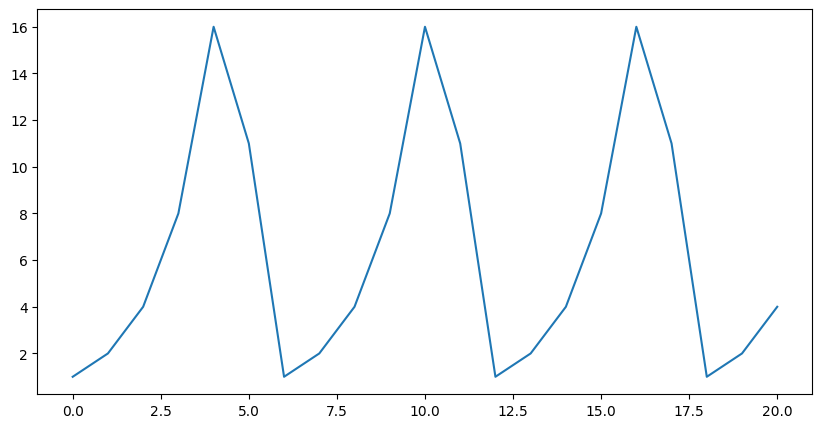

In [3]:
#visualización del periodo
a=2
N=21

#utiliza gcd de math libraries para chequear que a and N son coprimos
if math.gcd(a,N):
    print("Son coprimos")
else:
    print("No son coprimos")

#calcula la secuencia de resultados de f(x)    
for ind in range(N):
    print(int(math.pow(a,ind)%N))

#representalos en un plot con x el indice del resultado e y el valor
plt.figure(figsize=(10,5))
plt.plot([math.pow(a,x)%N for x in range(N)])


### Estrategia de resolver la factorizacion encontrando el periodo de la exponenciacion modular

La reducción de la factorización de $N$ al problema de encontrar el período de la funcion de exponenciacion modular de un número entero $a$ menor que $N$ y mayor que $1$, es consecuencia del siguiente resultado de la teoría de números:

> La función $\mathcal{f}(x) = a^x \bmod N$ es una función periódica, donde $a$ es un número entero coprimo de $N$ y $a \ge 0$.

> Dado que $\mathcal{f}(x)$ es una función periódica, tiene algún período $r$. Sabiendo que $a^0 \bmod N = 1$, esto significa que $a^r \bmod N = 1$ ya que la función es periódica y, por lo tanto, $r$ es solo la primera potencia distinta de cero donde $a^r = 1 (\bmod N)$.

Dada esta información y mediante la siguiente manipulación algebraica:
$$ a^r \equiv 1 \bmod N $$
$$ a^r = (a^{r/2})^2 \equiv 1 \bmod N $$
$$ (a^{r/2})^2 - 1 \equiv 0 \bmod N $$
y si $r$ es un número par:
$$ (a^{r/2} + 1)(a^{r/2} - 1) \equiv 0 \bmod N $$

A partir de esto, el producto $(a^{r/2} + 1)(a^{r/2} - 1)$ es un múltiplo entero de $N$, el número que se va a factorizar. Por lo tanto, siempre que $(a^{r/2} + 1)$ o $(a^{r/2} - 1)$ no sea un múltiplo de $N$, entonces al menos uno de $(a^ {r/2} + 1)$ o $(a^{r/2} - 1)$ debe tener un factor no trivial en común con $N$.

Entonces, calculando $\text{gcd}(a^{r/2} - 1, N)$ y $\text{gcd}(a^{r/2} + 1, N)$ se obtendrá un factor de $N $, donde $\text{gcd}$ es la función de máaimo común denominador, que se puede calcular mediante el tiempo polinomial [algoritmo euclidiano](https://en.wikipedia.org/wiki/Euclidean_algorithm).

### Resolucion clásica de la factorizacion

Supongamos por un momento que existe una funcion de búsqueda de períodos que toma como entrada números enteros coprimos $a, N$ y genera el período de $f(x)=a^x \bmod N$, implementado como búsqueda de fuerza bruta.

El algoritmo de Miler nos dice cómo usar la funcion para encontrar todos los factores primos de $N$ usando la teoría de números descrita anteriormente:

1) elegir un valor aleatorio de a, donde a<N y N=pq
2) encontrar el periodo r de $f(x) = a^x mod N$, que es el valor de r que cumple que $a^rr mod N = 1$
3) si r es par, calcular p= gcd($ a^{r/2} - 1$, N), q = gcd($a^{r/2} + 1$, N)
4) si r es impar, volver al paso 1 y elegir otro valor de a


#### EJERCICIO

Crea una funcion que tome como entrada dos numeros coprimos $a$ y $N$ y encuentre el periodo de la funcion de exponenciacion modular $\mathcal{f}(x) = a^x \bmod N$

Toma como ejemplo $N=15$ y calcula las secuencias y periodos obtenidos para todos los valores de $a<N$.
Calcula tambien los posibles factores de $N$:

$p=\text{gcd}(x^{r/2}-1,15)$

$q=\text{gcd}(x^{r/2}+1,15)$

Muestra los resultados en un formato similar a:

|  $a$  |         $a^x \bmod 15$       | Periodo $r$ |$p$|$q$ |
|:-----:|:----------------------------:|:----------:|:------------------------:|:-------------------------:|
|   2   | 1,2,4,8,1,2,4,8,1,2,4...     |      4     |             3            |             5             |
|   4   | 1,4,1,4,1,4,1,4,1,4,1...     |      2     |             3            |             5             |
|   7   | 1,7,4,13,1,7,4,13,1,7,4...   |      4     |             3            |             5             |
|   8   | 1,8,4,2,1,8,4,2,1,8,4...     |      4     |             3            |             5             |
|   11  | 1,11,1,11,1,11,1,11,1,11,1...|      2     |             5            |             3             |
|   13  | 1,13,4,7,1,13,4,7,1,13,4,... |      4     |             3            |             5             |
|   14  | 1,14,1,14,1,14,1,14,1,14,1,,,|      2     |             1            |             15            |


In [4]:
# Brute force period finding algorithm
def find_period_classical(a, N):
    r = 1
    lista = []
    for ind in range(N):
        #lista.append(int(math.pow(a,ind)%N))
        #print(int(math.pow(a,ind)%N))
        if ind > 1 and r == 1 and int(np.power(a,ind)%N) == 1:
            r = ind
    #print("El periodo es ", r)

    return [lista,r]

In [5]:
N=15

#para diferentes valores de a, calcula secuencia, periodo y posibles p y q y muestra resultados

for ind in range(1,N):
    resultado = find_period_classical(ind,N)
    if resultado[1]%2 == 0:
        p = math.gcd(int(ind**(resultado[1]/2)+1),N)
        q = math.gcd(int(ind**(resultado[1]/2)-1),N)
        print(f"{ind} | {resultado[0][:10]}... | {resultado[1]} | {p} | {q}\n")

1 | []... | 2 | 1 | 15

2 | []... | 4 | 5 | 3

4 | []... | 2 | 5 | 3

7 | []... | 4 | 5 | 3

8 | []... | 4 | 5 | 3

11 | []... | 2 | 3 | 5

13 | []... | 4 | 5 | 3

14 | []... | 2 | 15 | 1



Como puede verse, cualquier valor de $a$ excepto $1$ y $14$ devolverá los factores de $15$, es decir, $3$ y $5$. 

Vemos que $1$ y $14$ son ejemplos del caso especial donde $(a^{r/2} + 1)$ o $(a^{r/2} - 1)$ es un múltiplo de $N$ y por lo tanto hay que intentarlo con otro $a$. 

En general, se puede demostrar que este caso especial ocurre con poca frecuencia, por lo que, en promedio, sólo dos llamadas a la máquina de búsqueda de períodos son suficientes para factorizar $N$.

#### EJERCICIO

Crea una funcion que implemente el algoritmo de Miller, tomando como entrada un número $N$ y devolviendo sus factores $p$ y $q$

In [6]:
#calcula la funcion que implementa en algoritmo de Miller
def miller_algorithm_classical(N):
    #tu codigo
    a = np.random.randint(N-1)

    if math.gcd(a,N) == 1:
        encontrado = 1
        while encontrado:
            r = find_period_classical(a,N)[1]
            if r%2 == 1 or a**int(r/2)%N == -1:
                a = np.random.randint(N-1)
            else:
                p = math.gcd(int(a**(int(r/2))+1),N)
                q = math.gcd(int(a**(int(r/2))-1),N)
                encontrado = 0
    else:
        r = -1
        p = a
        q = N/a

    return a,r,p,q

#La probamos para fafctorizar un numero N
N = 330023
a,r,p,q = miller_algorithm_classical(N)
print("semiprime N = ",N,", coprime a = ",a,", period r = ",r,", prime factors = ",p," and ",q,sep="")

semiprime N = 330023, coprime a = 212289, period r = 128254, prime factors = 1 and 1


In [7]:
int(N/q)

330023

Con el siguiente codigo podemos calcular un número mayor $N$ semiprimo. Usando la [tabla de Eratóstenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes) [implementación de Python](http://archive.oreilly.com/pub/a/python/excerpt/pythonckbk_chap1/index1.html), generemos una lista de todos los números primos menores que diez mil, por ejemplo, seleccionamos dos al azar y los multiplícamos.

In [8]:
import random, itertools

# Sieve of Eratosthenes algorithm
def sieve( ):
    D = {  }
    yield 2
    for q in itertools.islice(itertools.count(3), 0, None, 2):
        p = D.pop(q, None)
        if p is None:
            D[q*q] = q
            yield q
        else:
            x = p + q
            while x in D or not (x&1):
                x += p
            D[x] = p

# Creates a list of prime numbers up to the given argument
def get_primes_sieve(n):
    return list(itertools.takewhile(lambda p: p<n, sieve()))

def get_semiprime(n):
    primes = get_primes_sieve(n)
    l = len(primes)
    p = primes[random.randrange(l)]
    q = primes[random.randrange(l)]
    return p,q,p*q

#N = get_semiprime(10000)

p,q,N = get_semiprime(100)

print('factores generados p=',p,'q=',q)
print("semiprime N =",N)

factores generados p= 11 q= 11
semiprime N = 121


Utilizalo para calcular la factorizacion de un $N$ mayor

In [9]:
#utiliza la funcion miller_algorithm_classical y obten los resultados
a,r,p,q = miller_algorithm_classical(N)
print("semiprime N = ",N,", coprime a = ",a,", period r = ",r,", prime factors = ",p," and ",q,sep="")

semiprime N = 121, coprime a = 28, period r = 26, prime factors = 1 and 1


## Algoritmo de Shor

El algoritmo de Shor, que lleva el nombre del matemático Peter Shor, es un algoritmo cuántico de tiempo polinómico para la factorización de enteros formulado en [1994](http://epubs.siam.org/doi/10.1137/S0097539795293172) . Podría decirse que es el ejemplo más dramático de cómo el paradigma de la computación cuántica cambió nuestra percepción sobre qué problemas computacionales deberían considerarse manejables, lo que motivó el estudio de nuevos algoritmos cuánticos y los esfuerzos para diseñar y construir computadoras cuánticas. También ha acelerado la investigación de nuevos criptosistemas que no se basen en la factorización de números enteros.

El algoritmo de Shor ha sido realizado experimentalmente por varios equipos para números enteros compuestos específicos. El $15$ compuesto se factorizó por primera vez en $3 \times 5$ en [2001](https://www.nature.com/nature/journal/v414/n6866/full/414883a.html) utilizando siete qubits de RMN, y desde entonces ha se implementó utilizando cuatro qubits de fotones en 2007 por [dos](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.99.250504) [equipos](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.99.250505), tres qubits de estado sólido en [2012](https://www.nature.com/nphys/journal/v8/n10/full/nphys2385.html) y cinco qubits de iones atrapados en [2016](http://science.sciencemag.org/content/351/6277/1068). El $21$ compuesto también se factorizó en $3 \times 7$ en [2012](http://www.nature.com/nphoton/journal/v6/n11/full/nphoton.2012.259.html) usando un qubit de fotones y qutrit (un sistema de tres niveles). Tambien hay que tener en cuenta que estas demostraciones experimentales se basan en optimizaciones significativas del algoritmo de Shor basadas en el conocimiento a priori de los resultados esperados. 

En general, se necesitan $2 + \frac{3}{2}\log_2N$ qubits para factorizar el entero compuesto $N$, lo que significa que se necesitarían al menos $1,154$ qubits para factorizar $RSA-768$ que comentabamos arriba.

In [10]:
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/hOlOY7NyMfs?start=75&end=126",560,315)

Como Peter Shor describe en el vídeo de arriba de [PhysicsWorld](http://physicsworld.com/cws/article/multimedia/2015/sep/30/what-is-shors-factoring-algorithm), el algoritmo de Shor se compone de tres partes. La primera parte utiliza la estrategia de convertir el problema de factorización en un problema de búsqueda de períodos, que se puede calcular en una computadora clásica. La segunda parte encuentra el período utilizando la transformada cuántica de Fourier y es responsable de la aceleración cuántica del algoritmo. La tercera parte utiliza el período encontrado para calcular los factores.

Los pasos para la factorizacion son los siguientes:

<img src="https://media.discordapp.net/attachments/1012968177258483802/1198660368977907712/image.png" width="500" height="600">

Ya conocemos la parte clasica, nos centraremos en la **subrutina cuantica** para calcular el periodo de la funcion de exponenciacion modular que constituye el algoritmo de Shor

### Exponenciacion modular

Un ordenador cuántico es capaz de encontrar de forma eficiente el periodo de $a^x\;mod\;N$ usando una puerta $U$ que sea capaz de hacer la multiplicación modular $U|y⟩ = |ay\;mod N⟩$

Aplicando U varias veces a |1⟩ obtenemos la operacion de exponenciacion modular, porque la exponenciacion es la repeticion de la multiplicacion:

\begin{equation}
  U^0|1⟩=|1\;mod\;N⟩=|a^0\;mod\;N⟩
\end{equation}
\begin{equation}
  U^1|1⟩=|a\;mod\;N⟩=|a^1\;mod\;N⟩
\end{equation}
\begin{equation}
  U^2|1⟩=|a^2\;mod\;N⟩
\end{equation}
\begin{equation}
  U^3|1⟩=|a^3\;mod\;N⟩
\end{equation}
\begin{equation}
  ...
\end{equation}
\begin{equation}
  U^r|1⟩=|a^r\;mod\;N⟩=|1\;mod\;N⟩
\end{equation}

Como la exponenciación es modulo *N*, $y$ es un numero que cumple $0 \leq y \leq N-1$ y si $N$ necesita n bits, entonces |y⟩ tambien.

#### EJERCICIO

Dado $N=21$ y $a=2$ tenemos el siguiente circuito que implementa $U|y⟩ = |2y\;mod 21⟩$

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


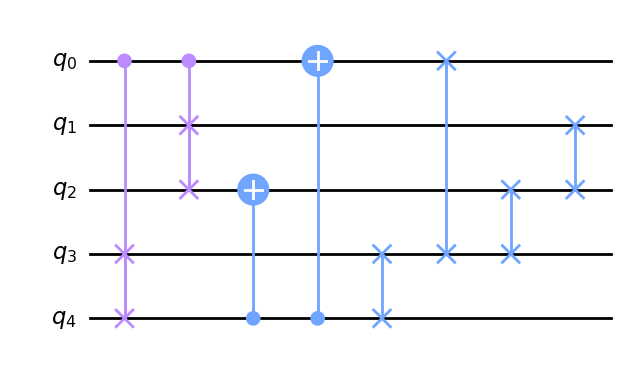

In [11]:
N=21
n= int(np.ceil(log(N+1,2)))  #5 bits

U = QuantumCircuit(n)
#Circuito: Uy = 2y mod 21
U.cswap(0,3,4)
U.cswap(0,1,2)
U.cx(4, 2)
U.cx(4, 0)
U.swap(3,4)
U.swap(0,3)
U.swap(3,2)
U.swap(2,1)
U.draw('mpl')

Calcula el resultado de aplicar U sucesivamente al vector de estados |1> y comprueba que el resultado es la secuencia de exponenciacion modular que esperamos en el caso clasico. Para comprobar el resultado de la secuencia de exponenciacion, utiliza la evolucion del vector de estados y medida de resultados de la evolucion que pueden calcularse de la clase [Statevector](https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.Statevector).

Muestra los resultados con el siguiente formato:
```
Apply U^0 times to |1> gives 1
Apply U^1 times to |1> gives 2
Apply U^2 times to |1> gives 4
Apply U^3 times to |1> gives 8
Apply U^4 times to |1> gives 16
Apply U^5 times to |1> gives 11
Apply U^6 times to |1> gives 1
Apply U^7 times to |1> gives 2
Apply U^8 times to |1> gives 4


In [12]:
#caso clasico - calcula la secuencia y el periodo de la funcion de exponenciacion modular para a=2 y N=21
#2 [2, 3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9]  Periodo r=  6  p= 1 q= 3

estado = Statevector.from_int(1,2**n)
display(estado.draw("latex"))

for ind in range(1,21):
    resultado = estado.evolve(U).sample_memory(1)
    print(f"U^{ind}|1> da {int(resultado[0],2)}")
    estado = Statevector.from_label(resultado[0])


<IPython.core.display.Latex object>

U^1|1> da 2
U^2|1> da 4
U^3|1> da 8
U^4|1> da 16
U^5|1> da 11
U^6|1> da 1
U^7|1> da 2
U^8|1> da 4
U^9|1> da 8
U^10|1> da 16
U^11|1> da 11
U^12|1> da 1
U^13|1> da 2
U^14|1> da 4
U^15|1> da 8
U^16|1> da 16
U^17|1> da 11
U^18|1> da 1
U^19|1> da 2
U^20|1> da 4


In [13]:
#caso cuantico - calcula la secuencia de la funcion de exponenciacion modular para a=2 y N=21

#repite en bucle las siguientes operaciones:
#  crea el vector de estados con valor entero 1
#  evolucionalo aplicando el circuito U
#  mide el valor entero que resulta tras la ejecucion y actualiza el valor entero del vector de estaddos



### Encontrar el periodo de la funcion de exponenciacion modular cuantica

Se da el caso de que dado un valor entero $s \in [1,r-1]$,  el vector $|u_s>$ definido como la superposicion de todos los estados de un ciclo es un vector propio de $U$ con valor propio $\frac{2\pi i s}{r}$

$$|u_s\rangle = \tfrac{1}{\sqrt{r}}\sum_{k=0}^{r-1}{e^{-\tfrac{2\pi i s k}{r}}|a^k \bmod N\rangle} $$

$$\begin{aligned}
U|u_s\rangle &= \tfrac{1}{\sqrt{r}}\sum_{k=0}^{r-1}{e^{-\tfrac{2\pi i s k}{r}} U |a^k \bmod N\rangle} = e^{\tfrac{2\pi i s}{r}}|u_s\rangle
\end{aligned}
$$

De forma que si utilizamos el algoritmo de estimacion de fase (QPE) y estimamos este valor propio de U podemos encontrar la fraccion $\frac{s}{r}$ y a partir de ella el valor del periodo $r$ de la exponenciacion modular. Para esto ultimo, usamos el algoritmo de las fracciones continuadas (incluido en la librería standard de python [Fraction](https://docs.python.org/3.10/library/fractions.html)

Para implementar el algoritmo de estimacion de fase necesitamos dos cosas:

*  Construir las puertas controladas U (CU) que implementan la version de puerta controlada de la exponenciacion modular
*  Contruir el vector $|u_s>$ vector porpio

Lo primero, se trata de construir un circuito que implemente la funcion de exponenciaciion modular para unos valores dados de $a$ y $N$ algo que nos vendra dado, porque no es una tarea trivial.

Para lo segundo, en lugar de construir un vector propio de $U$ para utilizar en el algoritmo de estimacion de fase, utilizaremos el vector superposicion de todos sus estados que puede demostrarse que es:

$$ \tfrac{1}{\sqrt{r}}\sum_{s=0}^{r-1} |u_s\rangle = |1\rangle$$

Por lo tanto se trata de un vector mas sencillo de implementar, lo que significa que si hacemos QPE en $U$ usando el estado $|1\rangle$, mediremos una fase:

$$\phi = \frac{s}{r}$$

para los diferentes valores de $s$ entre $0$ y $r-1$ con probabilidad $\frac{1}{r}$.

El diagrama del circuito se ve así siguiendo la convención de ordenamiento de qubits de Qiskit:

<img src="https://media.discordapp.net/attachments/1012968177258483802/1198688111610302647/image.png">

### Implementacion en Qiskit

Por lo general el numero de qubits m para implementar el registro contador donde recogeremos la estimacion de la fase $\frac{s}{r}$ debe de ser el menor $m$ que cumple $N^2<2^m<2N^2$

In [14]:
N=15
n= int(np.ceil(log(N+1,2)))            #4 bits
m= int(np.ceil(log(np.power(N,2),2)))  #minimo 8 qubits
print('n=',n, 'm=', m)

n= 4 m= 8


Creamos una funcion implementa las puertas controladas de exponenciacion modular de $N=15$ para diferentes valores de $a \in { 2,4,7,8,11, 13}$ elevadas a una potencia.

In [15]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)
    for _iteration in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{power} mod 15"
    c_U = U.control()
    return c_U

Tomamos la funcion de QFT inversa

In [16]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

#### EJERCICIO

Construimos el algoritmo de QPE para $a=7$, medimos el registro de conteo y obtenemos los posibles valores de fase para calcular el periodo de la funcion

In [17]:
a=7

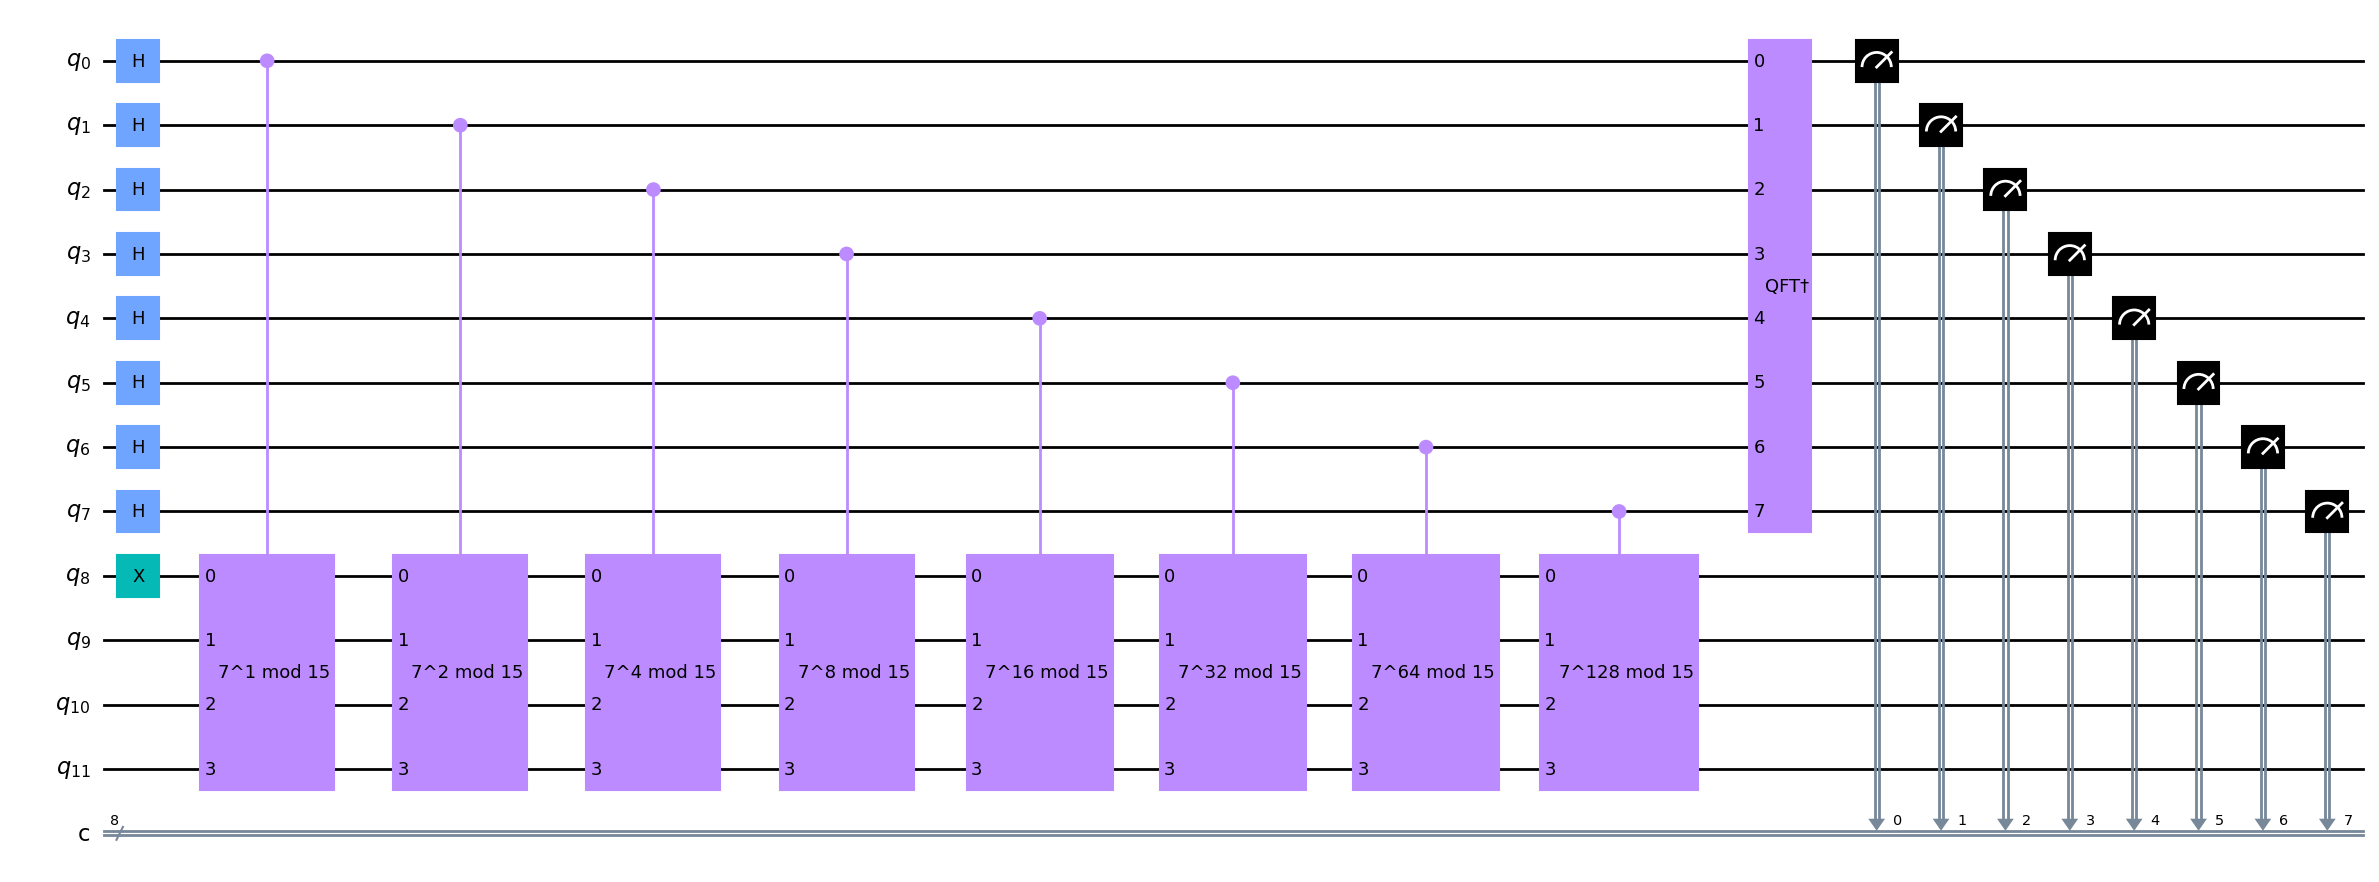

In [37]:
# Create QuantumCircuit with m counting qubits
# plus n qubits for U to act on
qc = QuantumCircuit(m+n,m)

# Initialize counting qubits
# in state |+>
qc.h(range(m))

# And auxiliary register in state |1>
qc.x(m)


# Do controlled-U operations
for i in range(m):
   qc.append(c_amod15(a,2**i),[i] + [r+m for r in range(n)])

# append inverse-QFT
qc.append(qft_dagger(m),range(m))


# Measure  and draw circuit
qc.measure(range(m),range(m))
display(qc.draw("mpl",fold=-1))



/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


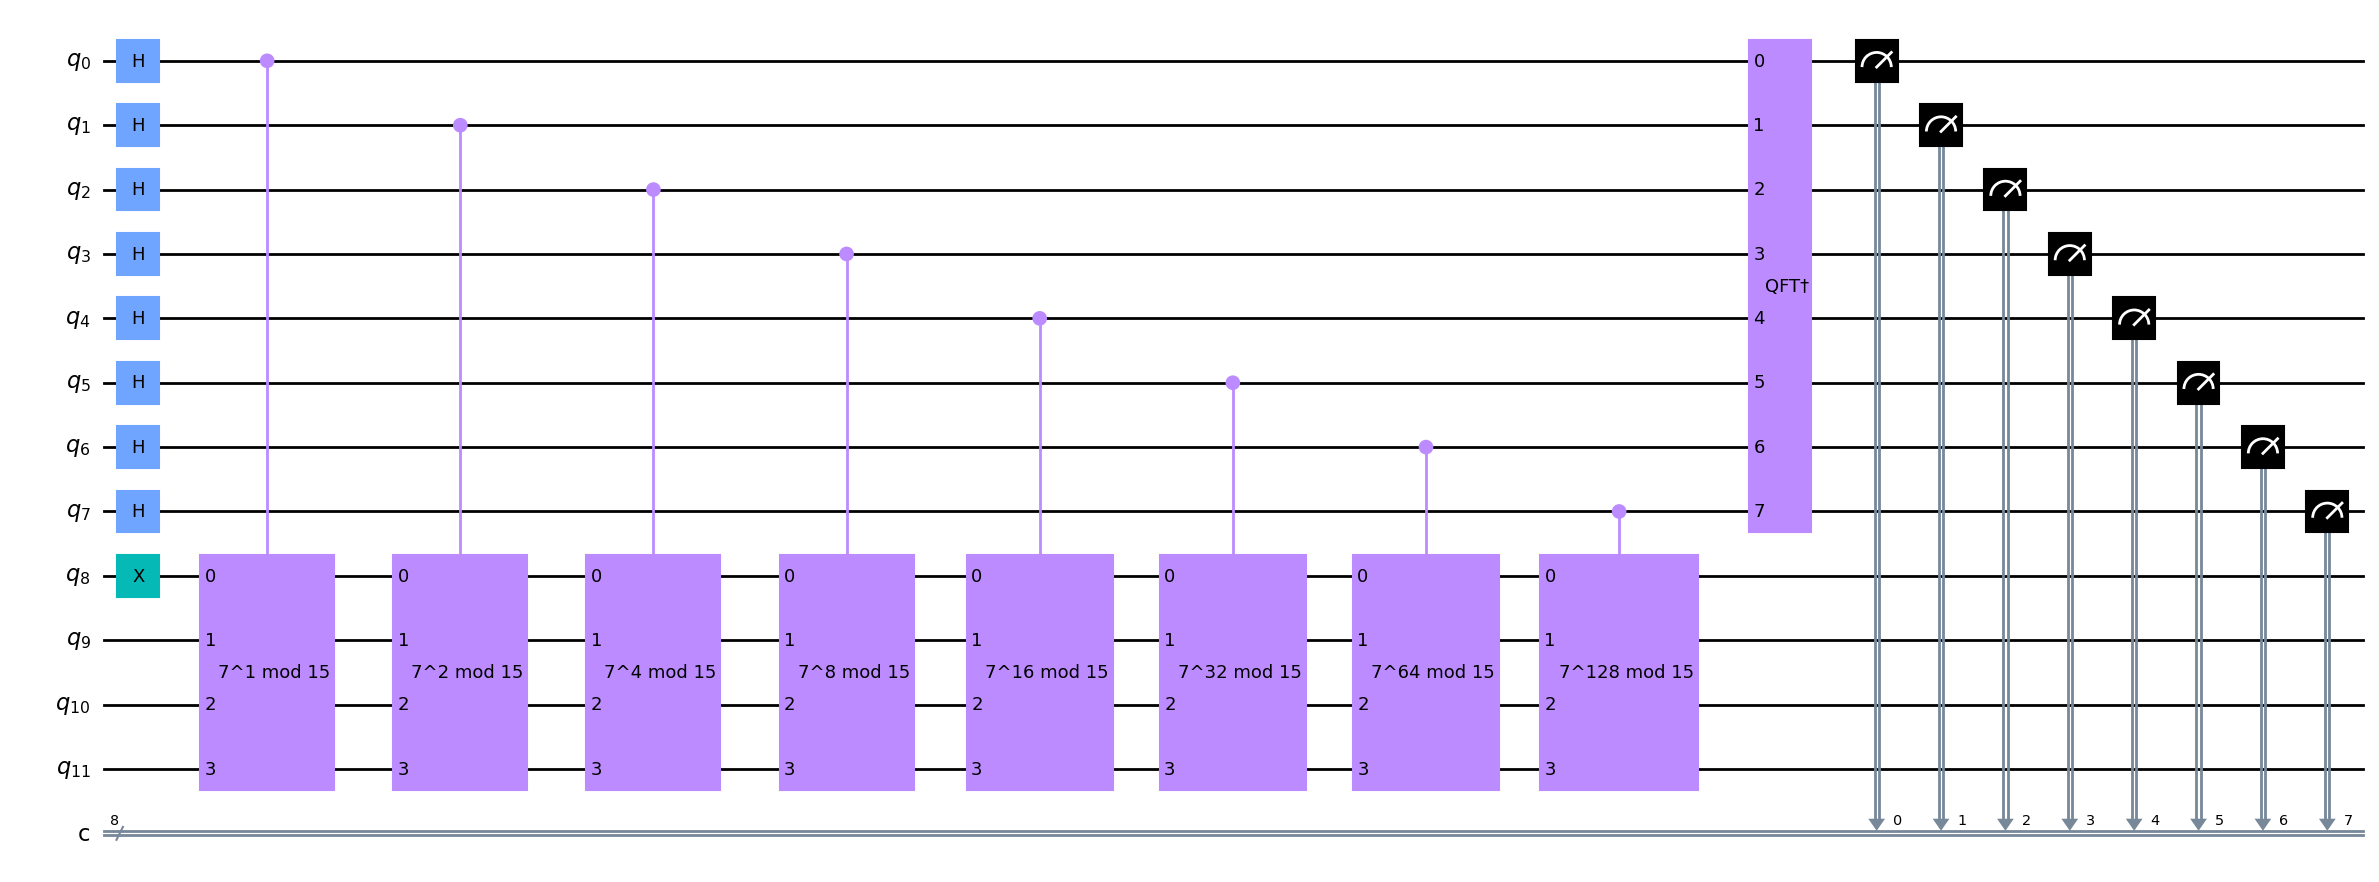

In [ ]:
# Create QuantumCircuit with m counting qubits

# plus n qubits for U to act on

qc = QuantumCircuit(m + n, m)



# Initialize counting qubits

# in state |+>

for q in range(m):

  qc.h(q)



# And auxiliary register in state |1>

qc.x(m)



# Do controlled-U operations

for q in range(m):

  qc.append(c_amod15(a, 2**q), [q] + [i+m for i in range(n)])



# Do inverse-QFT

qc.append(qft_dagger(m), range(m))



# Measure and draw circuit

qc.measure(range(m), range(m))

qc.draw("mpl",fold=-1) # -1 means 'do not fold'

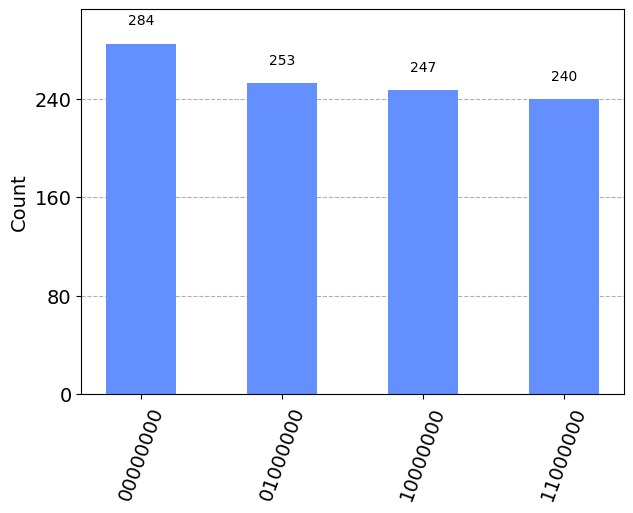

In [21]:
#measure the circuit
simulador = Aer.get_backend("aer_simulator")
tcirc = transpile(qc,simulador)
job = simulador.run(tcirc)
resultados = job.result()
plot_histogram(resultados.get_counts())

En los resultados tenemos el valor binario medido de $2^m \phi$ que es la fraccion $\frac{s}{r}$ y a partir de ella podemos calcular el valor del periodo $r$ de la exponenciacion modular. Para ello usamos el algoritmo de las fracciones continuadas (incluido en la librería standard de python [Fraction](https://docs.python.org/3.10/library/fractions.html))

In [22]:
#ejemplo uso de Fraction
# Get fraction that most closely resembles 0.666
# with denominator < 15
frac=Fraction(0.666).limit_denominator(15)
print(frac)
print(frac.denominator)

2/3
3


#### EJERCICIO

Saca por pantalla el valor obtenido en el registro de conteo $2^m \phi$ en binario, decimal y el valor de $\phi$

Utiliza la librería [Fraction](https://docs.python.org/3.10/library/fractions.html) y calcula tambien el valor de r

Finalmente, para los valores de $r$ par calcula los posibles valores de los factores de $N$

In [30]:
#para todos los valores medidos de counts calcula e imprime los siguientes datos
print('Binario - Decimal - Fase - Fraccion - Periodo')


periodos=[]
for ind in resultados.get_counts().keys():
    estimacion = int(ind,2)
    print(estimacion)
    phase = estimacion/2**m
    frac=Fraction(phase).limit_denominator(15)
    print("s/r: ",frac)
    print("Posible r: ",frac.denominator)
    if frac.denominator%2==0:
        periodos.append(frac.denominator)

#tambien recoge en una lista todos los posibles periodos

print(set(periodos))


Binario - Decimal - Fase - Fraccion - Periodo
0
s/r:  0
Posible r:  1
64
s/r:  1/4
Posible r:  4
192
s/r:  3/4
Posible r:  4
128
s/r:  1/2
Posible r:  2
{2, 4}


Podemos ver que dos de los valores propios medidos nos proporcionaron el resultado correcto: $r=4$, y podemos ver que el algoritmo de Shor tiene posibilidades de fallar. Estos malos resultados se deben a que $s = 0$, o porque $s$ y $r$ no son coprimos y en lugar de $r$ nos dan un factor de $r$. La solución más sencilla a esto es simplemente repetir el experimento hasta obtener un resultado satisfactorio para $r$.

In [32]:
a = 7
N = 15
#para los periodos anteriores recogidos en la lista, calcula posibles factores cuando sea par el periodo
for i in set(periodos):
    p = math.gcd(int(a**(int(i/2))+1),N)
    q = math.gcd(int(a**(int(i/2))-1),N)
    print(p,q)

1 3
5 3


#### EJERCICIO

Estima el periodo de la funcion de exponenciacion modular para el caso $a=2$ con $N=21$ con el circuito del operador $U$ utilizado anteriormente.

De los resultados de periodo obtenidos, calcula los posibles factores de $N=21$

In [ ]:
N=21
a=2



#### EJERCICIO

Ejecuta el Algoritmo de Shor para factorizar el numero $N=15$ en un circuito con ruido para $a=7$

Obten las fases y posibles periodos obtenidos en la medicion con ruido

#### EJERCICIO

Implementa el algoritmo de factorizacion de $N=15$ siguiendo los pasos del Algoritmo de Shor con su subrutina cuantica que se recogen en la figura

<img src="https://media.discordapp.net/attachments/1012968177258483802/1198660368977907712/image.png" width="300" height="300">

In [ ]:
N=15
